In [16]:
import numpy as np 
import matplotlib.pyplot as plt
import PySO
from tk import *
import matplotlib
import os

In [17]:
global w
global r_star 

w = 1
r_star = 4

In [33]:
def test_func(x):
    """
    x: ndarray shape (Ndim)
        points at which to evaluate the function on 
    """
    r = np.linalg.norm(x) 
    
    # f = np.exp(-1/2*((r-r_star)/w)**2)+np.exp(-1/2*np.sum((x-r_star)**2))
    f = np.exp(-1/2*((r-r_star)/w)**2)*np.exp(x[0]/10)

    return(f)

    

In [34]:
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
X,Y = np.meshgrid(x,y)
input_array = np.array([X.flatten(),Y.flatten()]).T
res = []
for i in input_array:
    res.append(test_func(i))

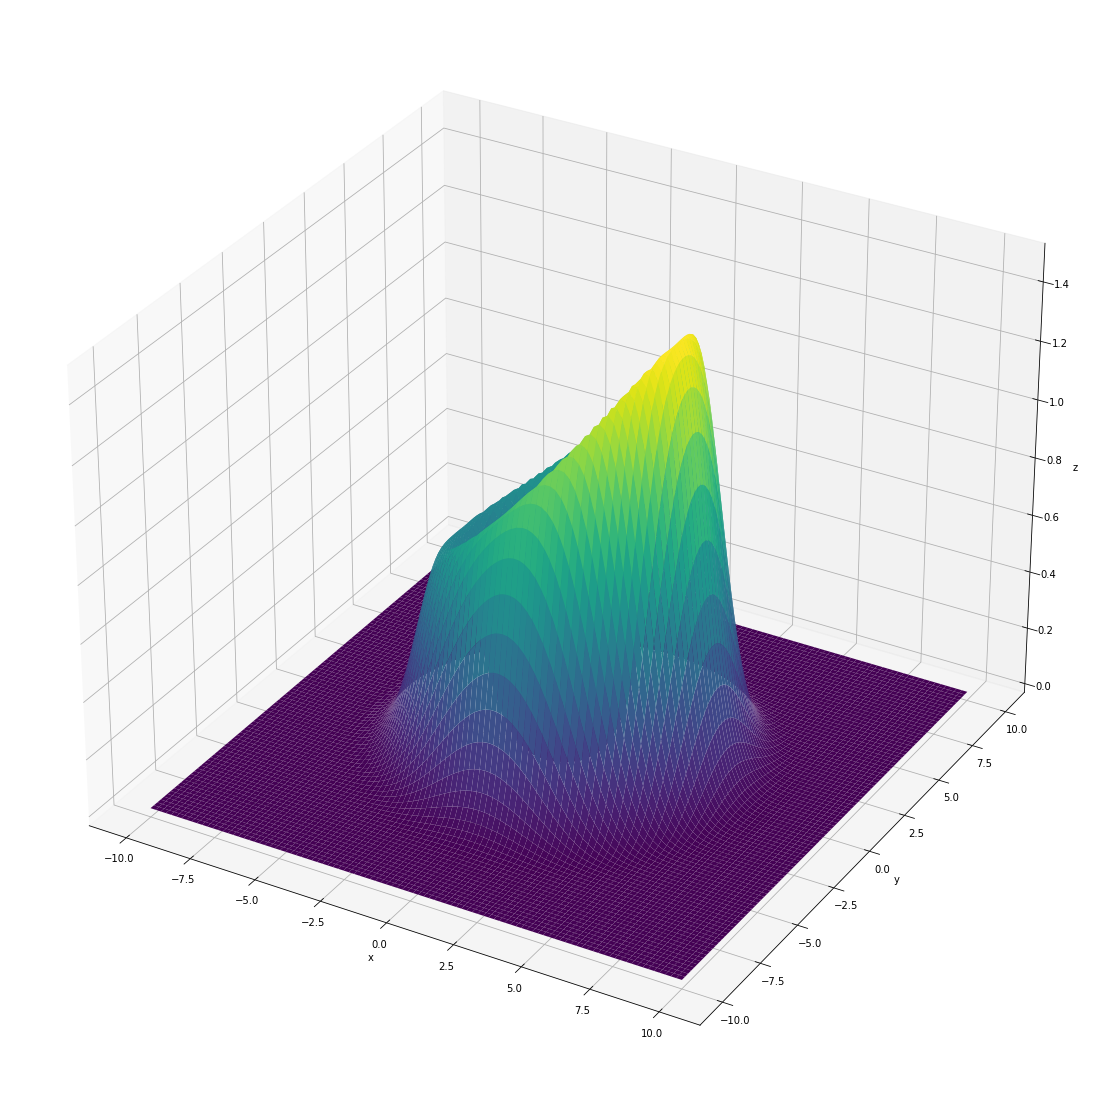

In [35]:
%matplotlib inline
res = np.array(res).reshape((100,100))

fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, res, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [7]:
# Number of dimensions used for PySO problem 


In [36]:
#Simple gaussian to optimize/sample 
class Degenerate_peak_model(PySO.Model):
    """
    An N dimensional model which exhibits a curved degeneracy which is hard to sample or optimize
    """
    dimensions = 15
    names    = [str(i) for i in range(dimensions)]
    bounds   = [[-10,10] for i in range(dimensions)]
    periodic = [0]*dimensions

    def log_likelihood(self, param):
        x = np.array([param[p] for p in self.names])
        r = np.linalg.norm(x) 

        f = np.exp(-1/2*((r-r_star)/w)**2)*np.exp(x[0]/10)
        return(f)


In [37]:

mymodel = Degenerate_peak_model()

NumParticles = 1000

outdir = 'results/'

myswarm = PySO.Swarm(mymodel,
                     NumParticles,
                     Output = outdir,
                     Verbose = True,
                     Nperiodiccheckpoint = 10, # Final two args mean evolution is saved at every iteration. Only necessary if running myswarm.Plot()
                     Saveevolution = True,    ############
                     Omega = 0.9694, Phip = 0.099381, Phig = 0.099381, Mh_fraction = 0.0, Maxiter=1000,
                     Velocity_minimum_factor = 100000000000,Nthreads=5)

# Clear any existing history file
history_file = os.path.join(outdir, "SwarmEvolutionHistory.dat")
if os.path.isfile(history_file): os.system('rm {}'.format(history_file))

myswarm.Run()



Iteration: 10, Max Value: 0.010570543081589976 at [-3.84868751e+00  3.97502754e+00 -2.29253605e+00  1.16680020e+00
 -1.18209538e+00  6.66723141e-01  9.31768445e-02  3.00039326e-01
  7.52764862e-04 -1.48387715e-01 -1.49197088e+00 -1.83829130e+00
 -1.46188532e+00 -6.94995941e-01  1.05971966e-02], Spread: 0.010570543081589976
Iteration: 20, Max Value: 0.9871738903839179 at [ 1.04920789  1.26616646  2.10473249  2.66474853  0.04083402 -0.32228882
 -1.3903484  -0.47458331 -0.33511505  0.82756474  0.06839247  0.15063082
 -1.51837896  0.1560328   0.68282947], Spread: 0.8369138756070087
Iteration: 30, Max Value: 1.3802417060012446 at [ 3.4027796  -0.84698116  1.44124715  1.36639783 -0.242766   -0.67381735
 -0.37002919  0.4836022  -0.28949848  0.22072637  0.13748901 -0.10061391
  0.19219711 -0.27059375  0.39843404], Spread: 1.3269572310246474
Iteration: 40, Max Value: 1.464099580133871 at [ 3.81337186 -0.13612089 -0.14162988 -0.23539965  0.08575785 -0.06650658
 -0.34120486  0.76825179 -0.2768520

KeyboardInterrupt: 